# **Stroke Prediction using SVM**

This notebook walks through the steps of preprocessing the data, training an SVM model, and evaluating its performance.

## 1. **Loading the Dataset** 📂

We start by importing the necessary libraries and loading the dataset.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("stroke.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 2. **Handling Missing Values** 🔄

We handle missing values by filling any NaN values in the BMI column with the mean of the column.

In [16]:
# Fill NaN values in the 'bmi' column with the column's mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Check for remaining missing values in the dataset
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 3. **Splitting Inputs and Outputs** 🎯

We separate the features (inputs) and the target variable (output). The target is 'stroke', and the rest of the features are stored in `inputs`.

In [17]:
inputs = df.drop('stroke', axis=1)
output = df['stroke']

## 4. **Encoding Categorical Variables** 🔢

We encode categorical variables such as gender, marital status, and work type into numerical values using `LabelEncoder`.

In [18]:
x = LabelEncoder()

# Encoding categorical variables
inputs['encodeGender'] = x.fit_transform(inputs['gender'])
inputs['encodeEver_married'] = x.fit_transform(inputs['ever_married'])
inputs['encodeWork_type'] = x.fit_transform(inputs['work_type'])
inputs['encodeResidence_type'] = x.fit_transform(inputs['Residence_type'])
inputs['encodeSmoking_status'] = x.fit_transform(inputs['smoking_status'])

# Preview the dataset with encoded variables
inputs.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,encodeGender,encodeEver_married,encodeWork_type,encodeResidence_type,encodeSmoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,2,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,0,1,3,0,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,0,1,3,0,2


## 5. **Dropping Original Categorical Columns** 🚮

After encoding, we drop the original categorical columns from the dataset.

In [19]:
inputs_n = inputs.drop(['gender', 'work_type', 'ever_married', 'Residence_type', 'smoking_status'], axis=1)

# Preview the dataset without original categorical columns
inputs_n.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,encodeGender,encodeEver_married,encodeWork_type,encodeResidence_type,encodeSmoking_status
0,9046,67.0,0,1,228.69,36.600000,1,1,2,1,1
1,51676,61.0,0,0,202.21,28.893237,0,1,3,0,2
2,31112,80.0,0,1,105.92,32.500000,1,1,2,0,2
3,60182,49.0,0,0,171.23,34.400000,0,1,2,1,3
4,1665,79.0,1,0,174.12,24.000000,0,1,3,0,2


## 6. **Train-Test Split** ✂️

We split the dataset into training and testing sets. 80% of the data will be used for training, while 20% will be reserved for testing.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n, output, test_size=0.2, random_state=42)

## 7. **Building the SVM Model** 💻

We create an SVM model using a polynomial kernel and balanced class weights. A `StandardScaler` is applied before the SVM to normalize the features.

In [21]:
from sklearn.svm import SVC


model = SVC()

model.fit(X_train, y_train)


SVC()

## 8. **Model Prediction** 📈

We use the trained model to predict the stroke outcomes for the test set.

In [22]:
y_pred = model.predict(X_test)

## 9. **Model Evaluation - Classification Report** 🧮

We evaluate the model's performance using a classification report, which provides precision, recall, F1-score, and support.

In [23]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\96653\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\96653\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\96653\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## 10. **Confusion Matrix** 📊

We also visualize the confusion matrix to see how well the model performed in classifying stroke versus non-stroke cases.

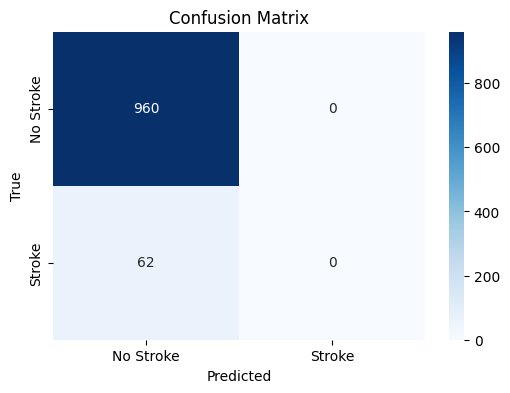

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from sklearn.metrics import precision_recall_fscore_support

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Precision, Recall, F1-Score
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train, train_predictions, average='weighted', zero_division=1)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, test_predictions, average='weighted', zero_division=1)

# Print Test Metrics First
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")

# Print Training Metrics Next
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")



Test Accuracy: 93.93%
Test Precision: 0.94
Test Recall: 0.94
Test F1-Score: 0.91
Training Accuracy: 95.43%
Training Precision: 0.96
Training Recall: 0.95
Training F1-Score: 0.93
